In [1]:

import pandas as pd
import numpy as np
#import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## reading in the csv files and seeing shape of data 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_copy = pd.read_csv("train.csv")
train_copy = train_copy.astype({"PassengerId":str})
test_copy = pd.read_csv("test.csv")
test_copy = test_copy.astype({"PassengerId":str})

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
train_copy.info()
print('-'*40)
train_copy.isnull().sum().sort_values(ascending = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
----------------------------------------


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
test_copy.info()
print('-'*40)
test_copy.isnull().sum().sort_values(ascending = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    object 
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 36.0+ KB
----------------------------------------


Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

## fill null values 

In [8]:
#replace missing age  with 0 , potentially with mean 
train_copy[['Age']]=train_copy[['Age']].fillna(train_copy[['Age']].mean())
test_copy[['Age']]=test_copy[['Age']].fillna(test_copy[['Age']].mean())
train_copy[['Embarked']]=train_copy[['Embarked']].fillna('S')
# test_copy[['Age']]=test_copy[['Age']].fillna(test_copy[['Age']].mean())
train_copy=train_copy.drop(['Cabin'],axis=1)
test_copy=test_copy.drop(['Cabin'],axis=1)
#median value replacement for age
# train_copy[['Age']]=train_copy[['Age']].fillna(train_copy[['Age']].median())
# test_copy[['Age']]=test_copy[['Age']].fillna(test_copy[['Age']].median())


## check for null values 

In [9]:
train_copy.info()
print('-'*40)
train_copy.isnull().sum().sort_values(ascending = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
----------------------------------------


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#possibly join sibling spouse and parch into family size

## remove outliers 

In [11]:
# Box Plot
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_copy, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 25 indices:  [7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [12]:
# Outliers in numerical variables

# column = train_copy["Fare"]
# max_index = column.idxmax()
# print(max_index)
train_copy.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.000000,4,1,3101295,39.6875,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.000000,0,1,PC 17582,153.4625,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.9000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.2000,C


In [13]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train_copy)))
train_copy = train_copy.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train_copy)))

Before: 891 rows
After: 866 rows


## Encoding Data and Grouping 

<AxesSubplot:>

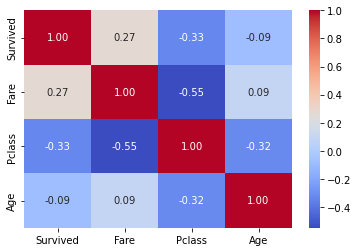

In [14]:
sns.heatmap(train_copy[['Survived','Fare','Pclass','Age']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [15]:


bins = [0,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86]
labels = ['0-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','71-75','76-80','81-85','86-x']
# labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
train_copy['Age'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)
train_copy.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,21-25,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36-40,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26-30,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,31-35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,31-35,0,0,373450,8.0500,S


In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Value counts of the sex column

train_copy['Age'].value_counts(dropna = False)
# Comment: There are more male passengers than female passengers on titanic

26-30    280
21-25    119
16-20     96
31-35     86
0-15      74
36-40     69
41-45     47
46-50     37
51-55     25
56-60     13
61-65     13
71-75      3
76-80      3
81-85      1
86-x       0
Name: Age, dtype: int64

In [18]:
# Mean of survival by sex
train_copy[['Age', 'Survived']].groupby('Age', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Age,Survived
13,81-85,1.000000
0,0-15,0.648649
4,31-35,0.476744
7,46-50,0.432432
5,36-40,0.405797
8,51-55,0.400000
6,41-45,0.361702
1,16-20,0.343750
2,21-25,0.336134
3,26-30,0.335714


## Feature engineering

In [19]:
# feature engineering 
train_copy['FamilySize']=train_copy['Parch']+train_copy['SibSp']+1
train_copy=train_copy.drop(['SibSp'],axis=1)
train_copy=train_copy.drop(['Parch'],axis=1)
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,21-25,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36-40,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26-30,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,31-35,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,31-35,373450,8.0500,S,1


In [20]:
# feature engineering 
test_copy['FamilySize']=test_copy['Parch']+test_copy['SibSp']+1
test_copy=test_copy.drop(['SibSp'],axis=1)
test_copy=test_copy.drop(['Parch'],axis=1)
test_copy.head()



,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,3


## SEX

<AxesSubplot:>

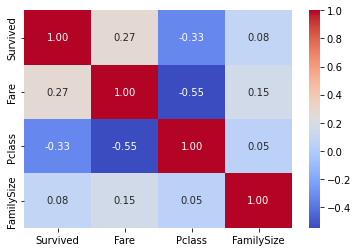

In [21]:
sns.heatmap(train_copy[['Survived','Fare','Pclass','FamilySize','Age']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [22]:
# Value counts of the sex column

train_copy['Sex'].value_counts(dropna = False)
# Comment: There are more male passengers than female passengers on titanic


male      562
female    304
Name: Sex, dtype: int64

In [23]:
# Mean of survival by sex
train_copy[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.753289
1,male,0.190391


## Pclass

In [24]:
# Value counts of the Pclass column 

train_copy['Pclass'].value_counts(dropna = False)

3    477
1    205
2    184
Name: Pclass, dtype: int64

In [25]:
# Mean of survival by passenger class

train_copy[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.634146
1,2,0.472826
2,3,0.249476


## Family Size

In [26]:
# Value counts of the Family column 

train_copy['FamilySize'].value_counts(dropna = False)

1    537
2    159
3     99
4     27
5     14
6     14
7     11
8      5
Name: FamilySize, dtype: int64

In [27]:
train_copy[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.740741
2,3,0.585859
1,2,0.547170
6,7,0.363636
0,1,0.303538
4,5,0.214286
5,6,0.071429
7,8,0.000000


<AxesSubplot:>

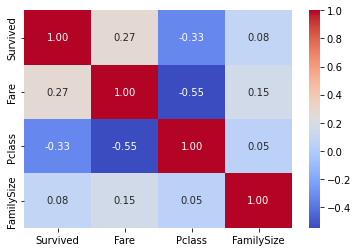

In [28]:
sns.heatmap(train_copy[['Survived','Fare','Pclass','FamilySize','Age']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')